In [1]:
import spacy
import pandas as pd

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
emma_ja = "emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of authority being now long passed away they had been living together as friend and friend very mutually attached and emma doing just what she liked highly esteeming miss taylors judgment but directed chiefly by her own"
print(emma_ja)

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [4]:
spacy_doc = nlp(emma_ja)
spacy_doc

emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twentyone years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sisters marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in mr woodhouses family less as a governess than a friend very fond of both daughters but particularly of emma between them it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restraint and the shadow of auth

In [5]:
pos_df = pd.DataFrame(columns=["token", "pos_tag"])

In [7]:
for token in spacy_doc:
    pos_df = pd.concat(
        [
            pos_df,
            pd.DataFrame.from_records([{"token": token.text, "pos_tag": token.pos_}]),
        ],
        ignore_index=True,
    )

In [9]:
pos_df.head(15)

,token,pos_tag
0,emma,PROPN
1,woodhouse,PROPN
2,handsome,ADJ
3,clever,ADJ
4,and,CCONJ
5,rich,ADJ
6,with,ADP
7,a,DET
8,comfortable,ADJ
9,home,NOUN


In [10]:
pos_df_counts = (
    pos_df.groupby(["token", "pos_tag"])
    .size()
    .reset_index(name="counts")
    .sort_values(by="counts", ascending=False)
)

In [11]:
pos_df_counts.head(15)

,token,pos_tag,counts
88,of,ADP,14
49,had,AUX,9
54,her,PRON,9
111,the,DET,8
6,and,CCONJ,8
0,a,DET,6
114,to,PART,5
61,in,ADP,4
13,been,AUX,4
120,very,ADV,4


<Axes: title={'center': 'Top 15 Tokens by Count'}, xlabel='Frequency', ylabel='Tokens'>

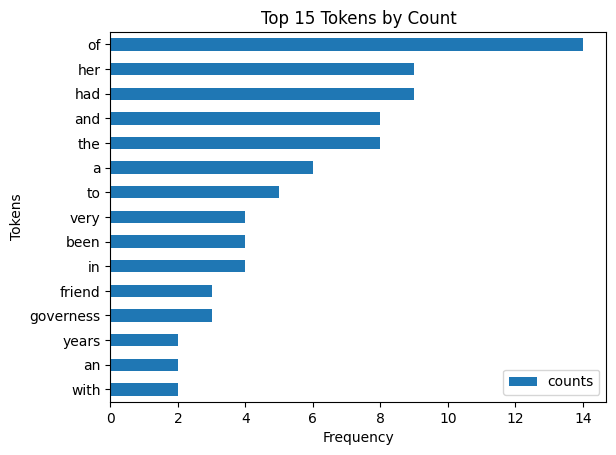

In [ ]:
pos_df_counts.head(15).sort_values(ascending=True, by="counts").plot(
    kind="barh",
    x="token",
    y="counts",
    title="Top 15 Tokens by Count",
    xlabel="Frequency",
    ylabel="Tokens",
)

In [21]:
pos_df_poscounts = (
    pos_df.groupby(["pos_tag"])["token"].count().sort_values(ascending=False)
)

In [22]:
pos_df_poscounts.head(15)

pos_tag
NOUN     44
ADP      28
ADV      22
ADJ      19
VERB     19
DET      18
PRON     18
AUX      16
CCONJ    11
PROPN     8
PART      5
NUM       3
SCONJ     3
Name: token, dtype: int64

In [15]:
nouns = pos_df_counts[pos_df_counts["pos_tag"] == "NOUN"][:10]
nouns

,token,pos_tag,counts
48,governess,NOUN,3
46,friend,NOUN,3
130,years,NOUN,2
35,emma,NOUN,2
28,daughters,NOUN,2
103,sisters,NOUN,2
82,mother,NOUN,2
89,office,NOUN,1
78,mistress,NOUN,1
75,mildness,NOUN,1


<Axes: title={'center': 'Parts of Speech Counts'}, xlabel='Frequency', ylabel='POS Tags'>

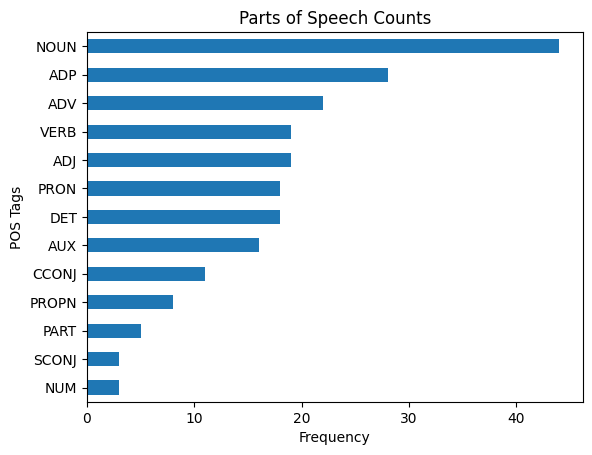

In [43]:
pos_df_poscounts.head(20).sort_values(ascending=True).plot(
    kind="barh",
    title="Parts of Speech Counts",
    orientation="horizontal",
    x="pos_tag",
    y="counts",
    ylabel="POS Tags",
    xlabel="Frequency",
)